In [31]:
!pip install numpy
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\megha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\megha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df = pd.read_csv(r"C:\Users\megha\Downloads\bengaluru_house_prices.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1 = df.drop(['area_type','availability','society'],axis='columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df1.isnull().sum() #it tells the no.of null values of a particular column

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2 = df1.dropna() #dropping all the na values
df2.isnull().sum() #checking whether there are any na values left

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
df2['size'].unique() # It is done to see what is in there in the size column of the data set

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [9]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\megha\AppData\Local\Temp\ipykernel_18496\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [12]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2166')

2166.0

In [18]:
df3 = df2.copy() #copying df2 dataframe to df4
df3['total_sqft']= df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [19]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [20]:
df3.head()


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [21]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,0.042500


In [22]:
len(df4.location.unique())

1265

In [23]:
#dimensionality problem since location are too many
df4.location= df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                 515
Sarjapur  Road             372
Electronic City            302
Kanakpura Road             261
Thanisandra                234
                          ... 
mvj engineering college      1
manyata tech park            1
manyata                      1
kg halli jalhalli west       1
kanakapura road              1
Name: location, Length: 1254, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1017

In [25]:
location_stats_less_10 = location_stats[location_stats<=10]
location_stats_less_10

location
Basapura                   10
Gunjur Palya               10
Dairy Circle               10
HAL 2nd Stage              10
Kalkere                    10
                           ..
mvj engineering college     1
manyata tech park           1
manyata                     1
kg halli jalhalli west      1
kanakapura road             1
Name: location, Length: 1017, dtype: int64

In [26]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_10 else x)
len(df4.location.unique())

238

In [27]:
#outliers detection and removal
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,0.106610
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,0.062963
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,0.200000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,0.047826
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,0.225352


In [28]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12055, 8)

In [29]:
df5.price_per_sqft.describe()

count    12013.000000
mean         0.062061
std          0.039855
min          0.002678
25%          0.041994
50%          0.052525
75%          0.068235
max          1.764706
Name: price_per_sqft, dtype: float64

In [30]:
#finding mean and other stuff to remove outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(9848, 8)

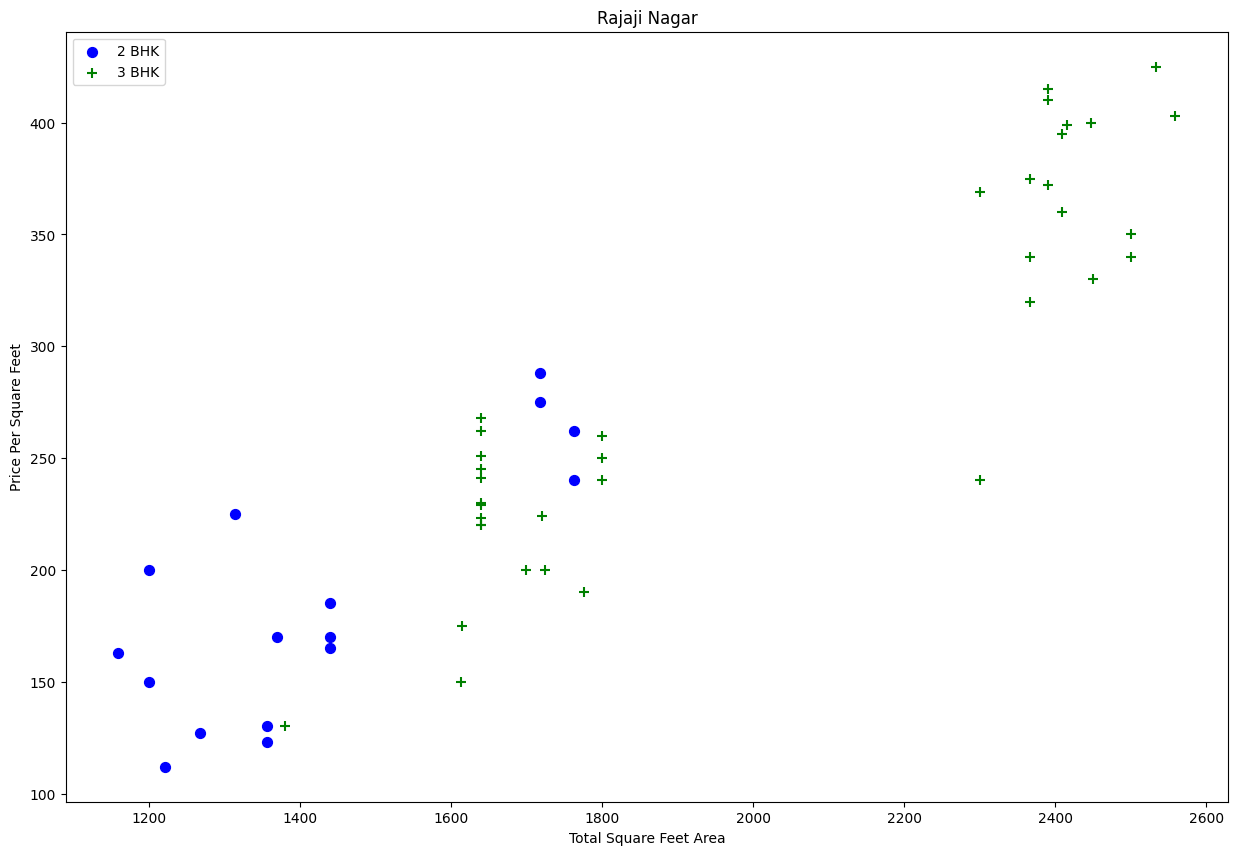

In [ ]:
#we are checking for building prices were the 2bhk is pricy than 3bhk and removing those as it doesn't generalize the things

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue',label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+', color = 'green',label = '3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6, "Rajaji Nagar")


In [ ]:
#removing those 2bhk apartments whose proce_PER_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' :np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]       
                }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [45]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7025, 8)

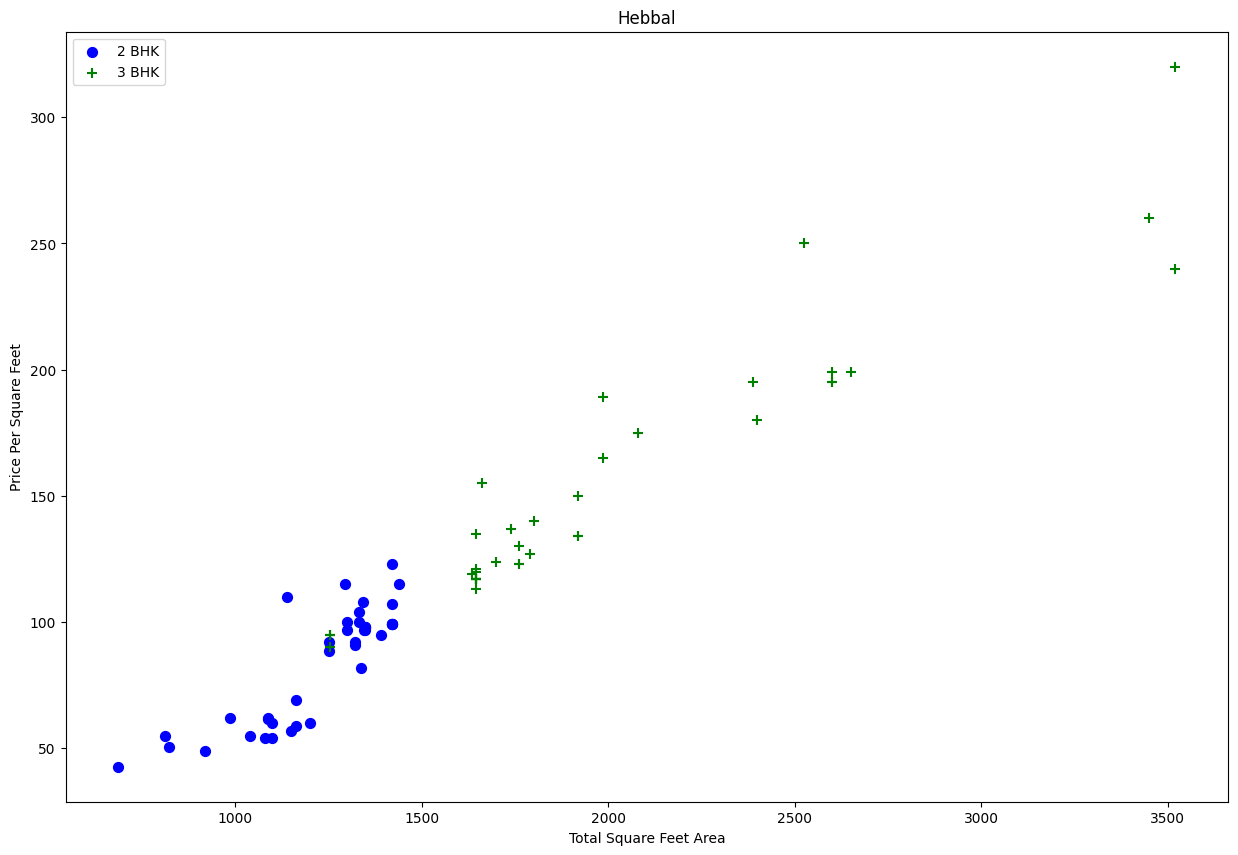

In [51]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

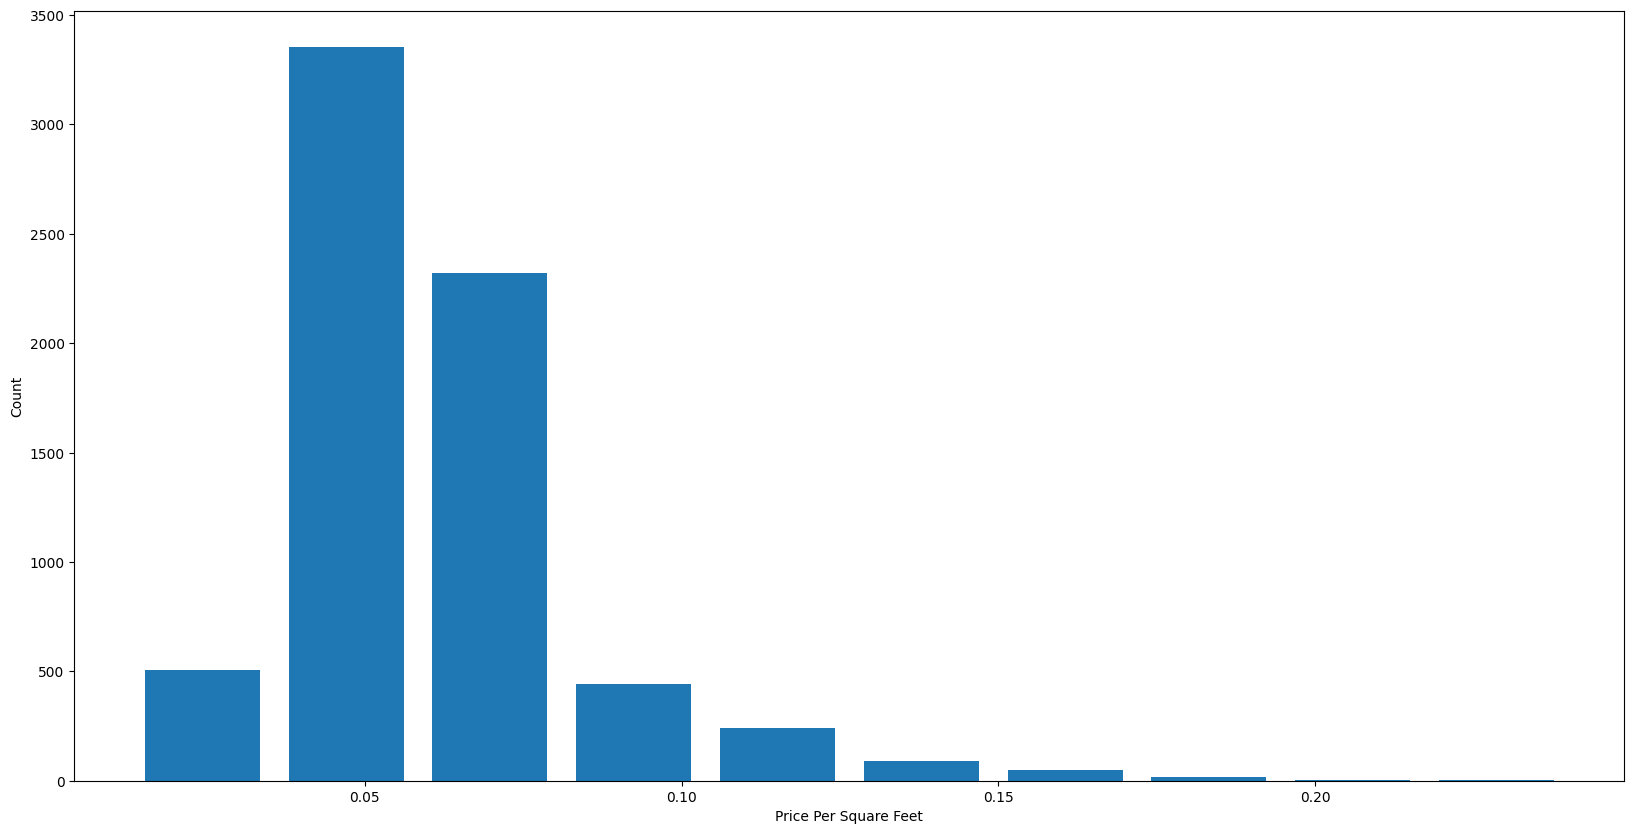

In [52]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [53]:
df7.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [54]:
df7[df7.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,0.050691


Text(0, 0.5, 'Count')

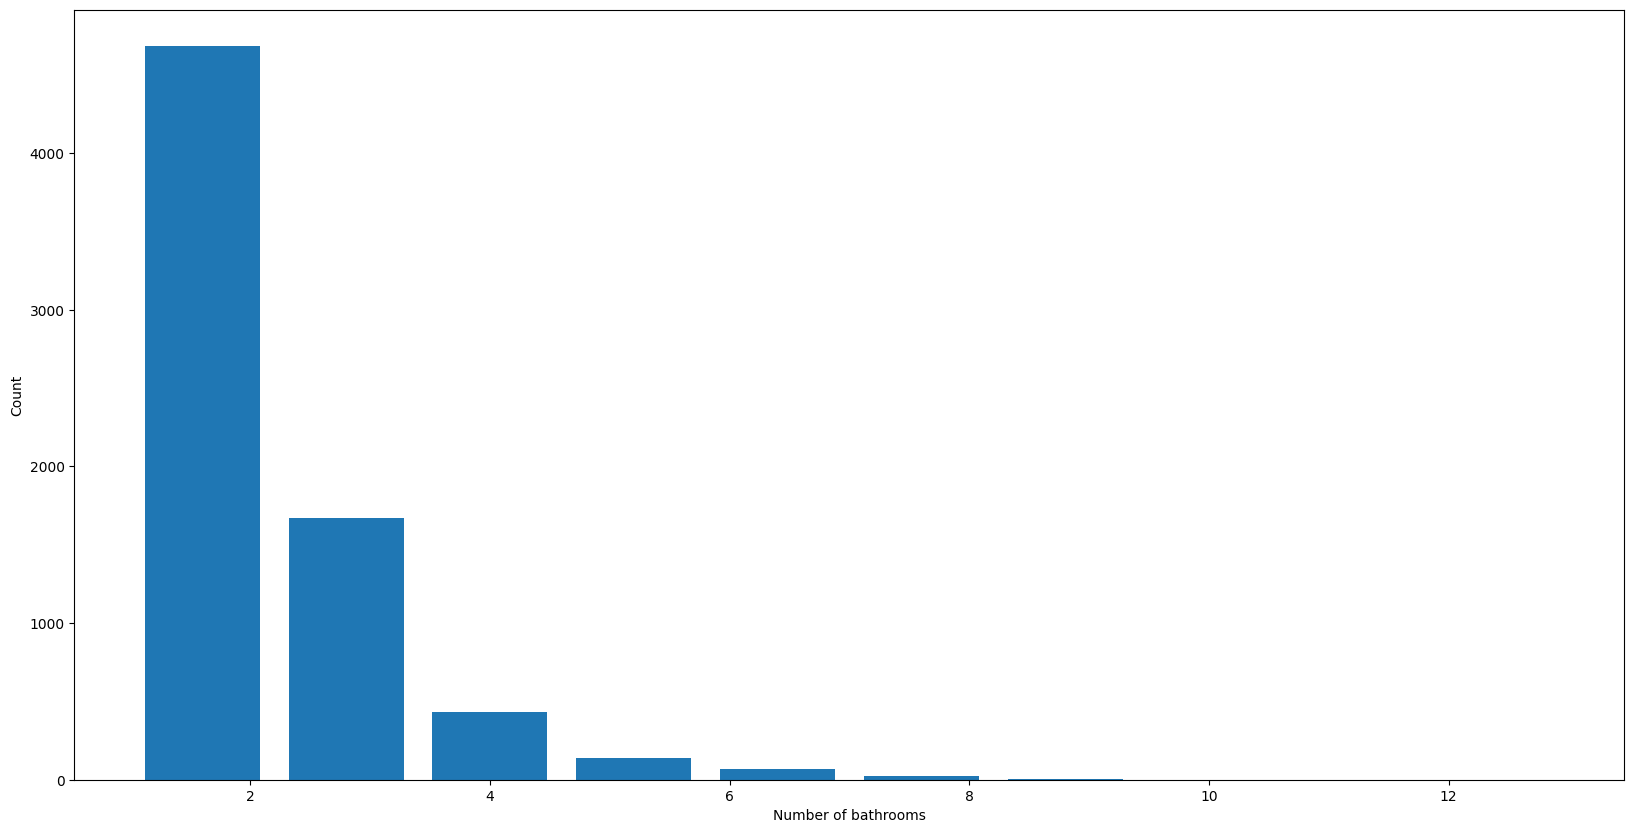

In [55]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [57]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,0.032520
6450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,0.064230
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,0.088199


In [59]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(6958, 8)

In [63]:
df8.balcony.unique()

array([1., 2., 3., 0.])

In [ ]:
df8[df8.balcony==3]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,0.125333
15,1st Phase JP Nagar,3 BHK,1590.0,3.0,3.0,131.0,3,0.082390
19,1st Phase JP Nagar,3 BHK,2077.0,3.0,3.0,175.0,3,0.084256
29,2nd Phase Judicial Layout,3 BHK,1681.0,3.0,3.0,69.0,3,0.041047
39,5th Phase JP Nagar,2 BHK,1150.0,3.0,3.0,52.5,2,0.045652
...,...,...,...,...,...,...,...,...
9774,other,3 BHK,1950.0,3.0,3.0,132.0,3,0.067692
9783,other,3 BHK,1200.0,3.0,3.0,75.0,3,0.062500
9786,other,3 BHK,1719.0,3.0,3.0,95.0,3,0.055265
9820,other,4 BHK,2872.0,4.0,3.0,183.0,4,0.063719


In [66]:
df8[df8.balcony==0]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,0.108333
5,1st Block Jayanagar,4 BHK,2750.0,4.0,0.0,413.0,4,0.150182
13,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,0.0,180.0,2,0.114943
49,5th Phase JP Nagar,2 BHK,1000.0,2.0,0.0,48.0,2,0.048000
87,7th Phase JP Nagar,2 BHK,1100.0,2.0,0.0,46.0,2,0.041818
...,...,...,...,...,...,...,...,...
9759,other,1 Bedroom,600.0,1.0,0.0,24.0,1,0.040000
9764,other,3 BHK,2250.0,3.0,0.0,180.0,3,0.080000
9797,other,3 Bedroom,1350.0,1.0,0.0,120.0,3,0.088889
9832,other,3 BHK,1490.0,3.0,0.0,140.0,3,0.093960


Text(0, 0.5, 'Count')

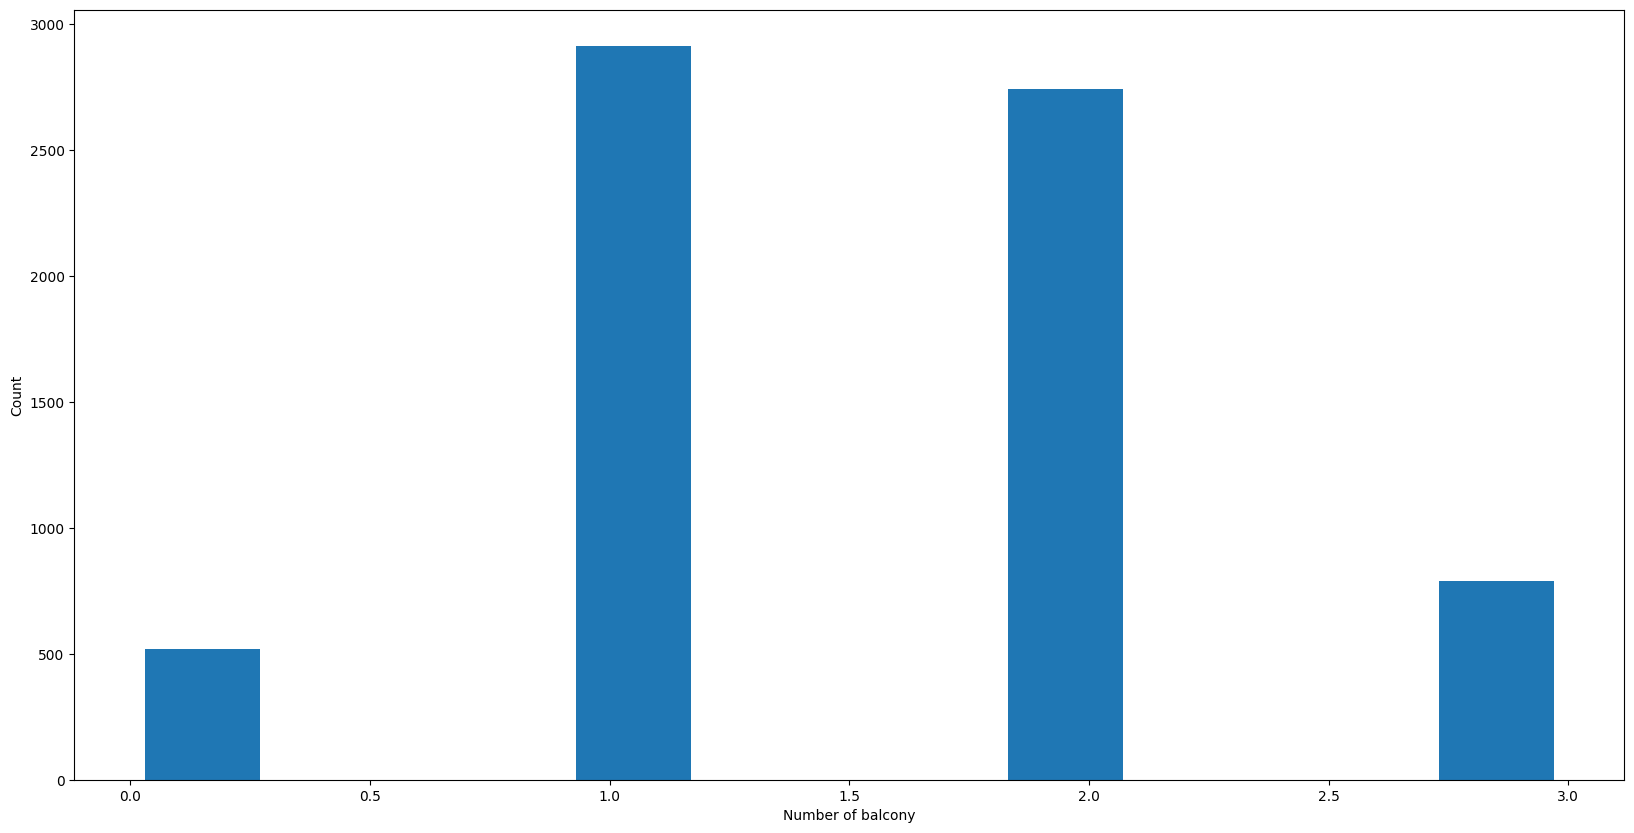

In [69]:
plt.hist(df8.balcony, rwidth = 0.8)
plt.xlabel("Number of balcony")
plt.ylabel("Count")

In [68]:
df_wb = df8[df8.balcony>0]
df_wb.shape

(6440, 8)